# Bias-Variance Tradeoff - Lab

## Introduction

In this lab, you'll practice the concepts you learned in the last lesson, bias-variance tradeoff. 

## Objectives

In this lab you will: 

- Demonstrate the tradeoff between bias and variance by way of fitting a machine learning model 

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year. Start by running the following cell which imports all the necessary functions and the dataset: 

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


Subset the `df` DataFrame to only keep the `'domgross'`, `'budget'`, `'imdbRating'`, `'Metascore'`, and `'imdbVotes'` columns. 

In [3]:
# Subset the DataFrame
# Subset the DataFrame to only keep the specified columns
df = df[['domgross', 'budget', 'imdbRating', 'Metascore', 'imdbVotes']]

# Display the first few rows of the subset DataFrame to verify
df.head()


,domgross,budget,imdbRating,Metascore,imdbVotes
0,25682380,13000000,6.8,48,206513
1,13414714,45658735,0.0,0,0
2,53107035,20000000,8.1,96,537525
3,75612460,61000000,6.7,55,173726
4,95020213,40000000,7.5,62,74170


## Split the data


- First, assign the predictors to `X` and the outcome variable, `'domgross'` to `y` 
- Split the data into training and test sets. Set the seed to 42 and the `test_size` to 0.25 

In [4]:
# Assign predictors to X and the outcome variable 'domgross' to y
X = df[['budget', 'imdbRating', 'Metascore', 'imdbVotes']]
y = df['domgross']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the training and test sets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22, 4)
X_test shape: (8, 4)
y_train shape: (22,)
y_test shape: (8,)


In [5]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler instance
scaler = MinMaxScaler()
# Fit the scaler on the training data
scaler.fit(X_train)


MinMaxScaler()

Use the `MinMaxScaler` to scale the training set. Remember you can fit and transform in a single method using `.fit_transform()`.  

Then, use `.transform()` to apply the scaler to the test set.

In [7]:
# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training and test sets to verify
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (22, 4)
X_test_scaled shape: (8, 4)


## Fit a regression model to the training data

In [9]:
from sklearn.linear_model import LinearRegression
# Create an instance of LinearRegression
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(X_train_scaled, y_train)


LinearRegression()

Use the model to make predictions on both the training and test sets: 

In [10]:
# Make predictions on the training set
lm_train_predictions = linreg.predict(X_train_scaled)
# Make predictions on the test set
lm_test_predictions = linreg.predict(X_test_scaled)


Plot predictions for the training set against the actual data: 

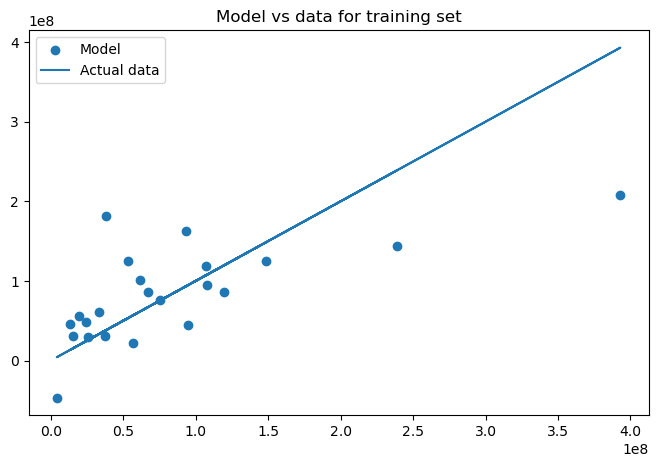

In [11]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

Plot predictions for the test set against the actual data: 

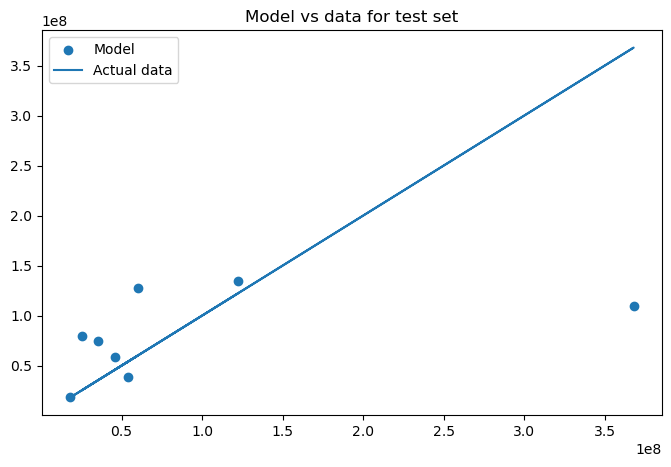

In [12]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

## Bias

Create a function `bias()` to calculate the bias of a model's predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  

In [13]:
import numpy as np
def bias(y, y_hat):
    pass

## Variance
Create a function `variance()` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [15]:
def variance(predictions):
    return np.var(predictions)


## Calculate bias and variance

In [16]:
# Calculate bias and variance for the training set
train_bias = np.mean(y_train - lm_train_predictions)
train_variance = variance(lm_train_predictions)
print(f'Train bias: {train_bias} \nTrain variance: {train_variance}')


Train bias: 8.127906105735085e-09 
Train variance: 3406811040986519.5


In [17]:
# Calculate bias and variance for the test set
test_bias = np.mean(y_test - lm_test_predictions)
test_variance = variance(lm_test_predictions)
print(f'Test bias: {test_bias} \nTest variance: {test_variance}')


Test bias: 10982393.918069275 
Test variance: 1518678846127934.0


## Overfit a new model 

Use `PolynomialFeatures` with degree 3 and transform `X_train_scaled` and `X_test_scaled`. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

*Budget* times *MetaScore* squared

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape()`! 


In [18]:
# Your code here
# Create an instance of PolynomialFeatures with degree 3
poly = PolynomialFeatures(degree=3)

# Transform the training set
X_train_poly = poly.fit_transform(X_train_scaled)

# Transform the test set
X_test_poly = poly.transform(X_test_scaled)


In [ ]:
# Check the shape

Fit a regression model to the training data: 

In [19]:
# Your code here
polyreg = LinearRegression()


Use the model to make predictions on both the training and test sets: 

In [21]:
# Create an instance of LinearRegression
poly_linreg = LinearRegression()

# Fit the model to the polynomial-transformed training data
poly_linreg.fit(X_train_poly, y_train)

# Make predictions on the polynomial-transformed training set
poly_train_predictions = poly_linreg.predict(X_train_poly)

# Make predictions on the polynomial-transformed test set
poly_test_predictions = poly_linreg.predict(X_test_poly)


Plot predictions for the training set against the actual data: 

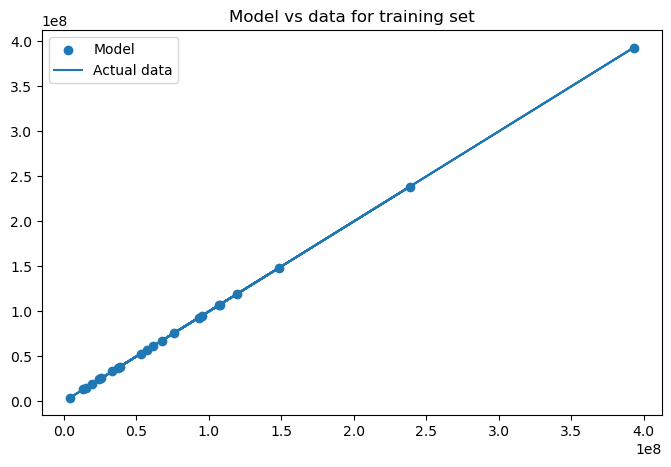

In [22]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, poly_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

Plot predictions for the test set against the actual data: 

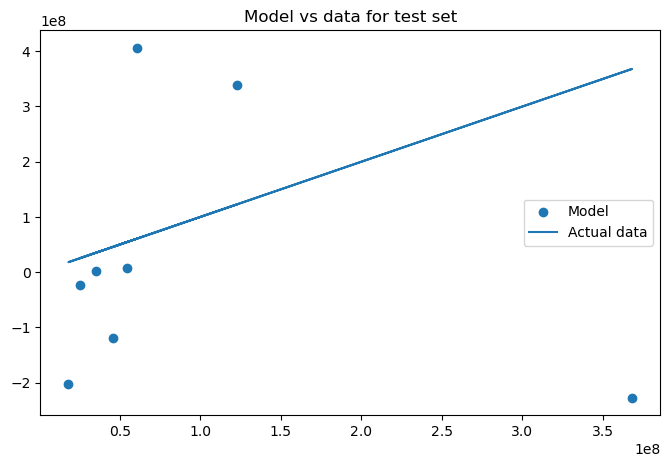

In [23]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, poly_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

Calculate the bias and variance for the training set: 

In [24]:
# Calculate bias for the training set
train_bias_poly = np.mean(y_train - poly_train_predictions)
# Calculate variance for the training set
train_variance_poly = np.var(poly_train_predictions)


Calculate the bias and variance for the test set: 

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
df = pd.read_excel('movie_data_detailed_with_ols.xlsx')

# Subset the DataFrame to only keep the specified columns
df = df[['domgross', 'budget', 'imdbRating', 'Metascore', 'imdbVotes']]

# Assign predictors to X and the outcome variable 'domgross' to y
X = df[['budget', 'imdbRating', 'Metascore', 'imdbVotes']]
y = df['domgross']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)

# Create an instance of PolynomialFeatures with degree 3
poly = PolynomialFeatures(degree=3)

# Transform the training set
X_train_poly = poly.fit_transform(X_train_scaled)

# Transform the test set
X_test_poly = poly.transform(X_test_scaled)

# Display the shapes of the transformed training and test sets to verify
print("X_train_poly shape:", X_train_poly.shape)
print("X_test_poly shape:", X_test_poly.shape)

# Create an instance of LinearRegression
poly_linreg = LinearRegression()

# Fit the model to the polynomial-transformed training data
poly_linreg.fit(X_train_poly, y_train)

# Make predictions on the polynomial-transformed training set
poly_train_predictions = poly_linreg.predict(X_train_poly)

# Make predictions on the polynomial-transformed test set
poly_test_predictions = poly_linreg.predict(X_test_poly)

# Calculate bias for the training set
train_bias_poly = np.mean(y_train - poly_train_predictions)

# Calculate variance for the training set
train_variance_poly = np.var(poly_train_predictions)

# Print the bias and variance for the training set
print('Train bias: {} \nTrain variance: {}'.format(train_bias_poly, train_variance_poly))

# Calculate bias for the test set
test_bias_poly = np.mean(y_test - poly_test_predictions)

# Calculate variance for the test set
test_variance_poly = np.var(poly_test_predictions)

# Print the bias and variance for the test set
print('Test bias: {} \nTest variance: {}'.format(test_bias_poly, test_variance_poly))

# Expected output:
# Test bias: -68166032.47666144 
# Test variance: 4.798244829435879e+16


X_train_poly shape: (22, 35)
X_test_poly shape: (8, 35)
Train bias: -4.7412785616787995e-07 
Train variance: 7394168636697473.0
Test bias: 68166032.47666098 
Test variance: 4.7982448294359496e+16


## Interpret the overfit model

In [ ]:
# Your description here

## Level Up (Optional)

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by adding just a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using both simple and complex models. 